In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Redes Adversarias (Generative Adversarial Networks)

* Las GANs están consideradas como uno de los avances más importantes en el aprendizaje profundo que permiten a los ordenadores generar nuevos datos (como nuevas imágenes).

* A través de un proceso de entrenamiento podremos generar imágenes artificiales muy similares a las imágenes originales usadas en dicho entrenamiento.

* Vamos a ver en qué consiste una GAN y cómo entrenarla. Después su implementación en Python, capaz de generar rostros humanos artificiales muy similares a un rostro real.

# ¿Qué son las Redes Adversarias? (GANs)

* Los algoritmos de aprendizaje automático son excelentes para reconocer patrones en los datos existentes y usar esa información para tareas como la clasificación y regresión. Sin embargo, cuando se les pide que generen nuevos datos, las computadoras han tenido problemas.

* Esta técnica ha permitido a las computadoras generar datos realistas mediante el uso no de una, sino de dos redes neuronales separadas.

* Las GAN han logrado resultados notables que durante mucho tiempo se habían considerado prácticamente imposibles para los sistemas artificiales, como la capacidad de generar imágenes falsas con una calidad similar a la del mundo real, convertir un garabato en una imagen similar a una fotografía, o convierta las imágenes de video de un caballo en una cebra corriendo, todo sin la necesidad de grandes cantidades de datos de entrenamiento minuciosamente etiquetados.

* Este tipo de red fue propuesto por [Ian Goodfellow](https://arxiv.org/abs/1406.2661) y sus colegas como un método para sintetizar nuevas imágenes utilizando deep neural networks (NNs) en el año 2014. Sin embargo, desde su introducción, los autores originales, así como muchos otros investigadores, han propuesto
numerosas mejoras y diversas aplicaciones en distintos campos de la ingeniería y la ciencia.

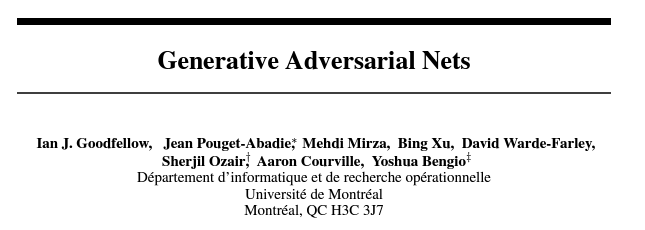

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Imagenes/1.png", width=600)

Por ejemplo, los recientes avances en la investigación de GANs han dado lugar a modelos que capaces de generar nuevas imágenes faciales de alta resolución. Ejemplos de imágenes de alta resolución en https://www.thispersondoesnotexist.com/, donde se muestran imágenes faciales sintéticas
generadas por un GANs.

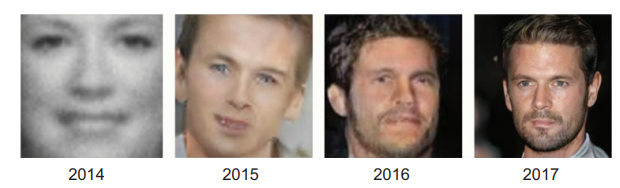

In [ ]:
Image("/content/drive/MyDrive/Imagenes/progresorostros.png", width=700)

Progreso en la generación de rostros humanos.
Fuente: “The Malicious Use of Artificial Intelligence: Forecasting, Prevention, and Mitigation,” by Miles Brundage et al.,
2018, https://arxiv.org/abs/1802.07228

En una GANs se tienen dos modelos compitiendo: un Generador y un Discriminador. La competencia entre estos dos se puede ver a través de una analogía: el Generador es como un falsificador, que intenta producir billetes falsos sin que estos sean detectados, mientras que el Discriminador es como el policía, que intenta detectar estos billetes falsos.

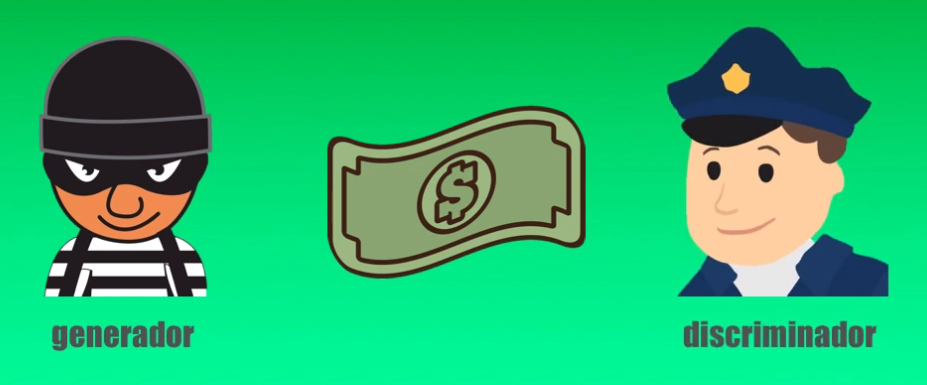

In [ ]:
Image("/content/drive/MyDrive/Imagenes/2.png", width=600)

Esta competición lleva a ambos equipos (falsificador y policía, o generador y discriminador) a mejorar sus métodos.

* En el caso de las GANs se busca que al final sea el falsificador quien gane este juego, es decir que logre finalmente engañar al policía.

* Por último, la palabra redes indica la clase de modelos de aprendizaje automático más utilizados para representar el Generador y el Discriminador: las redes neuronales.

* Dependiendo de la complejidad de la implementación de la GAN, estas pueden variar desde simples redes neuronales hasta redes neuronales convolucionales.

Imaginemos que nuestro objetivo es enseñar a una GAN a producir dígitos escritos a mano de aspecto realista. Usaremos el dataset MNIST.

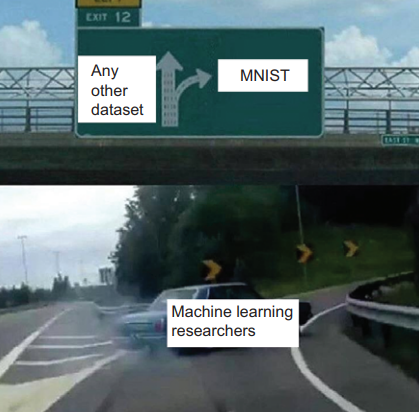

In [ ]:
Image("/content/drive/MyDrive/Imagenes/meme.png", width=400)

Formalmente, el Generador y el Discriminador están representados por funciones diferenciables, como las redes neuronales, cada una con su propia función de costo. Las dos se entrenan mediante backpropagation con el uso de la pérdida del discriminador. El Discriminador se esfuerza por minimizar la pérdida tanto para los ejemplos reales como para los falsos, mientras que el Generador trata de maximizar la pérdida del Discriminador para los ejemplos falsos que produce.

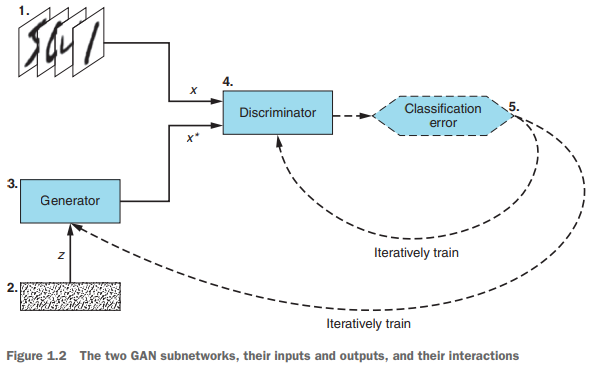

In [ ]:
Image("/content/drive/MyDrive/Imagenes/gan1.png", width=600)

Conjunto de datos de entrenamiento: el conjunto de datos de ejemplos reales que

1.   Conjunto de datos de entrenamiento: el conjunto de datos de ejemplos  reales que queremos que el generador aprenda a emular con una calidad casi perfecta. En este caso, el conjunto de datos consta de imágenes de dígitos escritos a mano. Este conjunto de datos sirve como entrada $(x)$ para la red Discriminator.
2.   Vector de ruido aleatorio: : la entrada sin procesar $(z)$ a la red del generador. Esta entrada es un vector de números aleatorios que el Generador utiliza como punto de partida para sintetizar ejemplos falsos.

3. Generador: toma un vector de números aleatorios $(z)$ como entrada y produce ejemplos falsos $(x^*)$. Su objetivo es hacer que los ejemplos falsos que produce sean indistinguibles de los ejemplos reales en el conjunto de datos de entrenamiento.

4. Discriminador: toma como entrada un ejemplo real $(x)$ procedente del conjunto de entrenamiento o un ejemplo falso $(x^*)$ producido por el generador. Para cada ejemplo, el discriminador determina la probabilidad de que el ejemplo sea real.

5. Entrenamiento/ajuste iterativo: para cada una de las predicciones del discriminador, determinamos qué tan buena es, al igual que lo haríamos para un clasificador normal, y usamos los resultados para ajustar iterativamente las redes del discriminador y del generador a través de backpropagation:

      *   Las ponderaciones y los sesgos del discriminador se actualizan para maximizar su precisión de clasificación (maximizando la probabilidad de predicción correcta: $x$ como real y $x^*$ como falso).
      *   Los pesos y sesgos del Generador se actualizan para maximizar la probabilidad de que el Discriminador clasifique erróneamente $x^*$ como real.

La siguiente figura muestra una arquitectura de alto nivel de la GAN que vamos a implementar.

En el transcurso de las iteraciones de entrenamiento, el generador aprende a convertir la entrada de ruido aleatorio en imágenes que se parecen a los a los datos de entrenamiento: el conjunto de datos MNIST de dígitos escritos a mano. Al mismo tiempo, el discriminador aprende a distinguir las imágenes falsas producidas por el generador de las genuinas que provienen del conjunto de datos de entrenamiento.

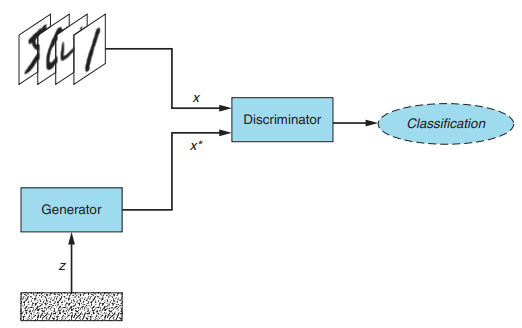

In [ ]:
Image("/content/drive/MyDrive/Imagenes/modelo.png", width=600)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

Especificamos las dimensiones de entrada de nuestro modelo y conjunto de datos. Cada imagen en MNIST tiene 28 × 28 píxeles con un solo canal (porque las imágenes son en escala de grises). La variable z_dim establece el tamaño del vector de ruido, z

In [ ]:
img_rows = 28
img_cols = 28
channels = 1

# Dimensiones de la imagen de entrada
img_shape = (img_rows, img_cols, channels)

# Tamaño del vector de ruido, utilizado como entrada para el generador
z_dim = 100

## Generador

Para simplificar, el generador es una red neuronal con una sola capa oculta. Toma z como entrada y produce una imagen de 28 × 28 × 1.

En la capa oculta, utilizamos la función de activación Leaky ReLU. A diferencia de una función ReLU normal, que asigna cualquier entrada negativa a 0, Leaky ReLU permite un pequeño gradiente positivo. Esto evita que los gradientes se extingan durante el entrenamiento, lo que tiende a producir mejores resultados de entrenamiento.

En la capa de salida, empleamos la función de activación $\operatorname{tanh}(x)$, que escala los valores de salida al rango $[–1, 1]$. La razón para usar tanh (a diferencia de, por ejemplo, sigmoide, que generaría valores en el rango más típico de 0 a 1) es que $\operatorname{tanh}(x)$ tiende a producir imágenes más nítidas. En la siguiente lista se implementa el generador.

In [ ]:
def build_generator(img_shape, z_dim):

    model = Sequential()

    # Fully connected layer
    model.add(Dense(128, input_dim=z_dim))

    # Leaky ReLU
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Dense(28 * 28 * 1, activation='tanh'))

    # Reshape the Generator output to image dimensions
    model.add(Reshape(img_shape))

    return model

## Discriminador

El discriminador toma una imagen de 28 × 28 × 1 y genera una probabilidad que indica si la entrada se considera real en lugar de falsa. El discriminador está representado por una red neuronal de dos capas, con 128 unidades ocultas y una función de activación de Leaky ReLU en la capa oculta.

Por simplicidad, el discriminador se ve casi idéntico al generador. Esto no tiene por qué ser así; de hecho, en la mayoría de las implementaciones de GAN, las arquitecturas de red del generador y del discriminador varían mucho tanto en tamaño como en complejidad.

A diferencia del generador, aplicamos la función de activación sigmoide en la capa de salida del discriminador. Esto asegura que nuestro valor de salida estará entre 0 y 1, por lo que se puede interpretar como la probabilidad que asigna el Generador de que la entrada sea real.

In [ ]:
def build_discriminator(img_shape):

    model = Sequential()

    # Aplana la imagen de entrada
    model.add(Flatten(input_shape=img_shape))

    # Fully connected layer
    model.add(Dense(128))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    return model

## Contrucción del Modelo



Construimos y compilamos los modelos Generador y Discriminador implementados anteriormente. En el modelo combinado utilizado para entrenar el generador, mantenemos fijos los parámetros del discriminador estableciendo el trainable en False. El Discriminador se establece en no entrenable, se usa solo para entrenar al generador.

El discriminador se entrena como un modelo compilado de forma independiente. (Esto se hará evidente cuando revisemos el ciclo de entrenamiento).

Usamos la entropía cruzada binaria como la función de pérdida que buscamos minimizar durante el entrenamiento.

La entropía cruzada binaria mide la diferencia entre las probabilidades calculadas y las probabilidades reales para predicciones con solo dos clases posibles.

Cuanto mayor es la pérdida de entropía cruzada, más lejos están nuestras predicciones de las etiquetas verdaderas.

Para optimizar cada red, utilizamos Adam.

In [ ]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [ ]:
# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(img_shape, z_dim)

# Mantiene constantes los parámetros del discriminador para el entrenamiento del generador
discriminator.trainable = False

# Construye y compila un modelo GAN con un discriminador fijo para entrenar el generador
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

## Entrenamiento

Obtenemos un minilote aleatorio de imágenes MNIST como ejemplos reales y generamos un minilote de imágenes falsas a partir de vectores de ruido aleatorios z.

Los utilizamos para entrenar el discriminador mientras mantenemos constantes los parámetros del generador. A continuación, generamos un minilote de imágenes falsas y las usamos para entrenar la red del generador mientras mantenemos fijos los parámetros del discriminador. Repetimos esto para cada iteración

Utilizamos one-hot-encoded: 1 para las imágenes reales y 0 para las falsas. Para generar z, tomamos muestras de la distribución normal estándar (media de 0 y una desviación estándar de 1)

El discriminador está entrenado para asignar etiquetas falsas a las imágenes falsas y etiquetas reales a las imágenes reales.

El Generador está entrenado de tal manera que el Discriminador asigna etiquetas reales a los ejemplos falsos que produce

In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    # Load the MNIST dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z,verbose=0)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z,verbose=0)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

La función sample_images() llama cada sample_interval iteraciones y genera una cuadrícula de 4 × 4 de imágenes sintetizadas por el generador en la iteración dada. Después de ejecutar nuestro modelo, usaremos estas imágenes para inspeccionar los resultados intermedios y finales.

In [ ]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

## Entrenar el GAN y analizar su salida.

Establecemos los hiperparámetros de entrenamiento (el número de iteraciones y el tamaño del lote) y entrenamos el modelo. No existe un método probado para determinar el número correcto de iteraciones o el tamaño de lote correcto; Los determinamos experimentalmente a través de prueba y error a medida que observamos el progreso del entrenamiento.

Dicho esto, existen importantes restricciones prácticas para estos números: cada minilote debe ser lo suficientemente pequeño como para caber dentro de la memoria de procesamiento (los tamaños de lote típicos que usa la gente son potencias de 2: 32, 64, 128, 256 y 512).

El número de iteraciones también tiene una restricción práctica: cuantas más iteraciones tengamos, más tiempo llevará el proceso de entrenamiento. Con modelos complejos de aprendizaje profundo como las GAN, esto puede salirse de control rápidamente, incluso con una potencia informática significativa.

Para determinar el número correcto de iteraciones, supervisamos la pérdida de entrenamiento y establecemos el número de iteración alrededor del punto en el que la pérdida se estabiliza, lo que indica que estamos obteniendo poca o ninguna mejora incremental del entrenamiento posterior. (Debido a que se trata de un modelo generativo, el sobreajuste es tan preocupante como lo es para los algoritmos de aprendizaje supervisado).

1000 [D loss: 0.600544, acc.: 76.95%] [G loss: 2.615468]
1/1 [==============================] - 0s 16ms/step
2000 [D loss: 0.277743, acc.: 90.23%] [G loss: 3.736038]
1/1 [==============================] - 0s 28ms/step
3000 [D loss: 0.353397, acc.: 85.16%] [G loss: 3.079871]
1/1 [==============================] - 0s 32ms/step
4000 [D loss: 0.342617, acc.: 85.94%] [G loss: 3.276801]
1/1 [==============================] - 0s 26ms/step
5000 [D loss: 0.298200, acc.: 88.67%] [G loss: 3.441180]
1/1 [==============================] - 0s 19ms/step
6000 [D loss: 0.331716, acc.: 86.72%] [G loss: 3.399608]
1/1 [==============================] - 0s 16ms/step
7000 [D loss: 0.355682, acc.: 86.72%] [G loss: 3.360950]
1/1 [==============================] - 0s 25ms/step
8000 [D loss: 0.362299, acc.: 84.38%] [G loss: 2.522193]
1/1 [==============================] - 0s 17ms/step
9000 [D loss: 0.439695, acc.: 80.08%] [G loss: 2.047763]
1/1 [==============================] - 0s 16ms/step
10000 [D loss: 0.42

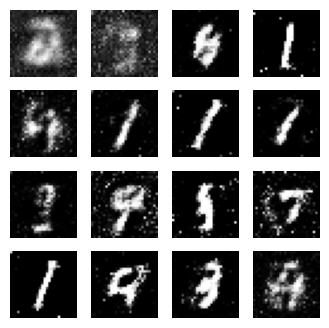

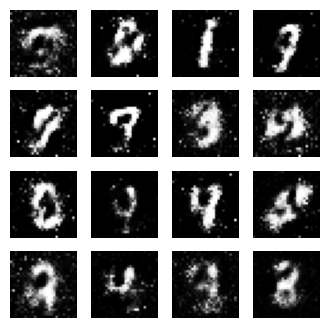

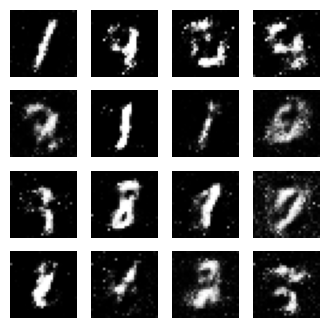

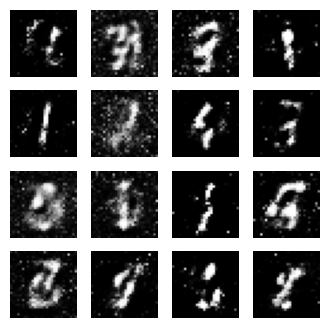

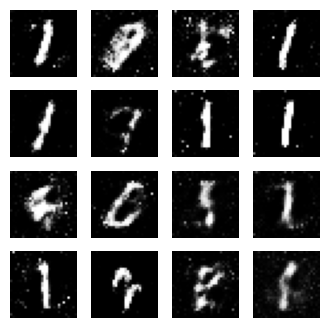

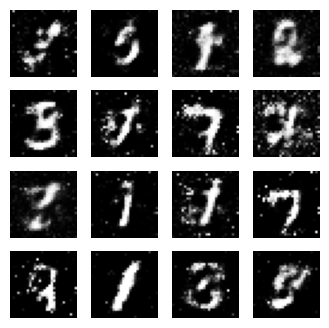

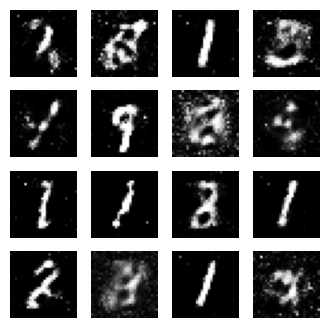

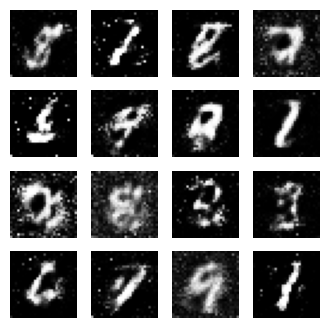

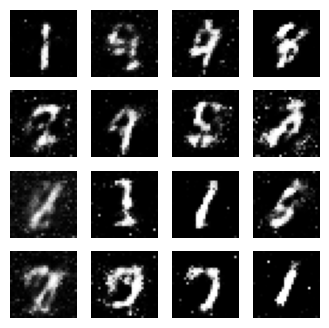

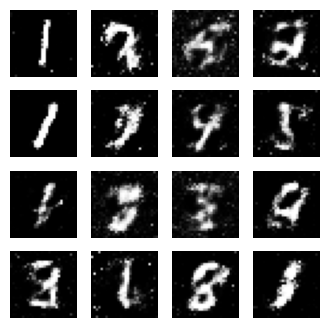

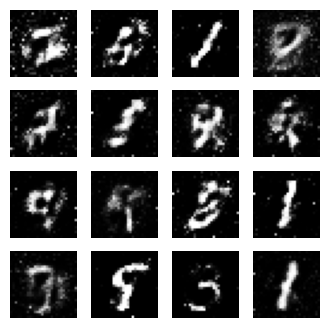

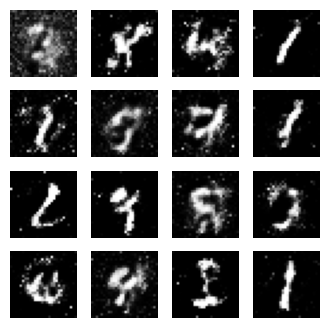

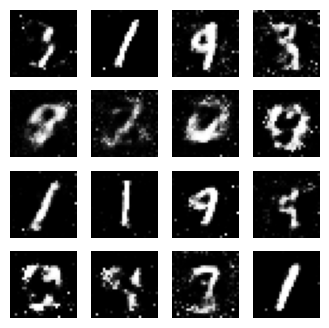

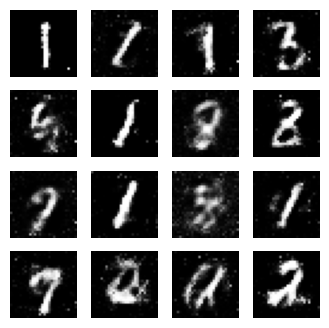

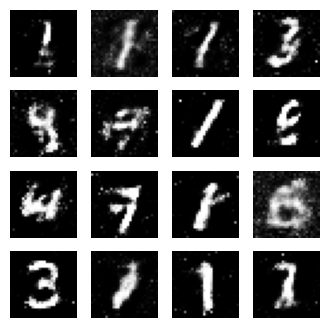

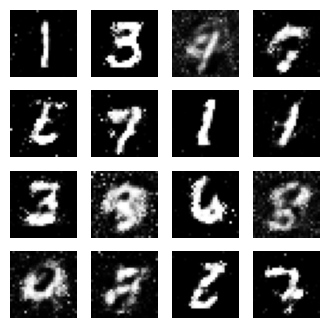

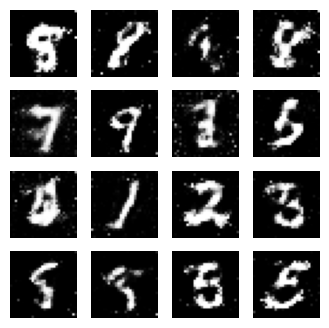

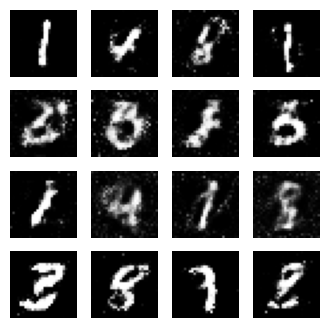

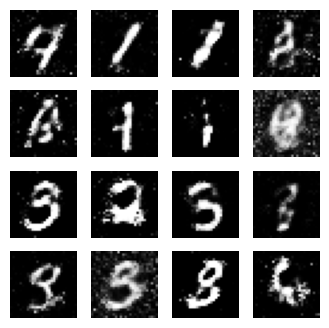

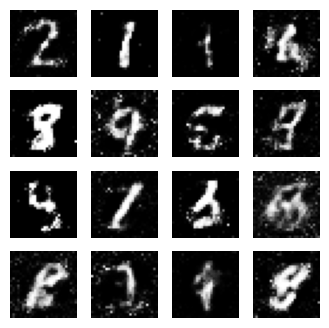

In [ ]:
# Set hyperparameters
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

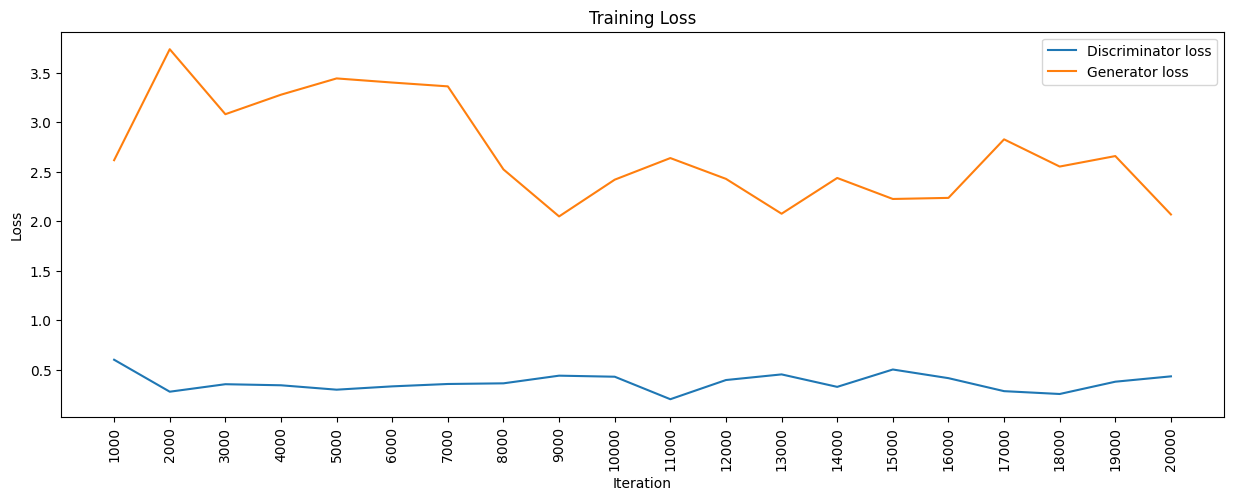

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

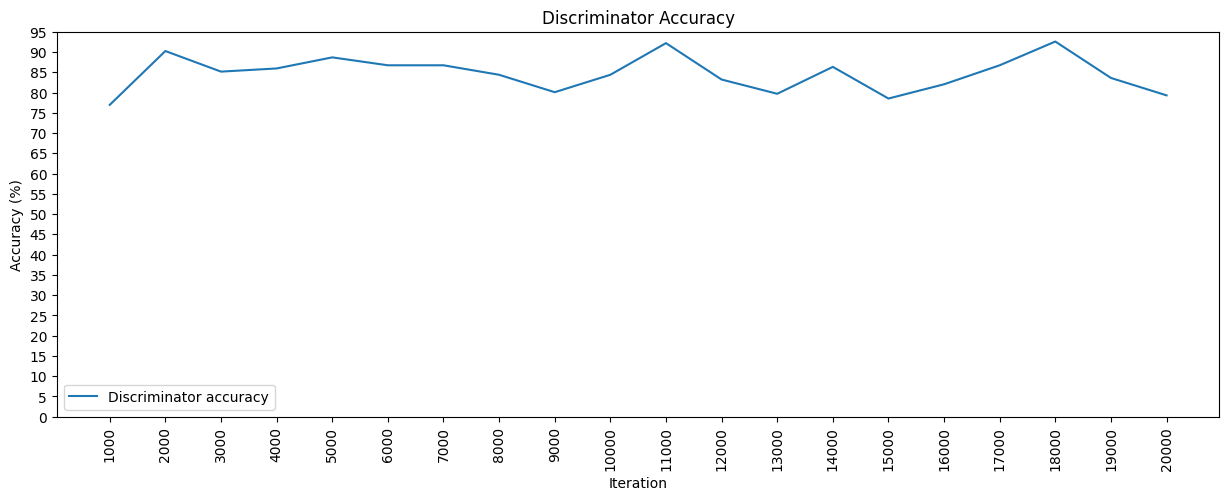

In [ ]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()

Referencias: [Jakub Langr, Vladimir Bok - GANs in Action_ Deep learning with Generative Adversarial Networks-Manning Publications (2019)](https://www.amazon.com/GANs-Action-Learning-Generative-Adversarial/dp/B09237G4TH)

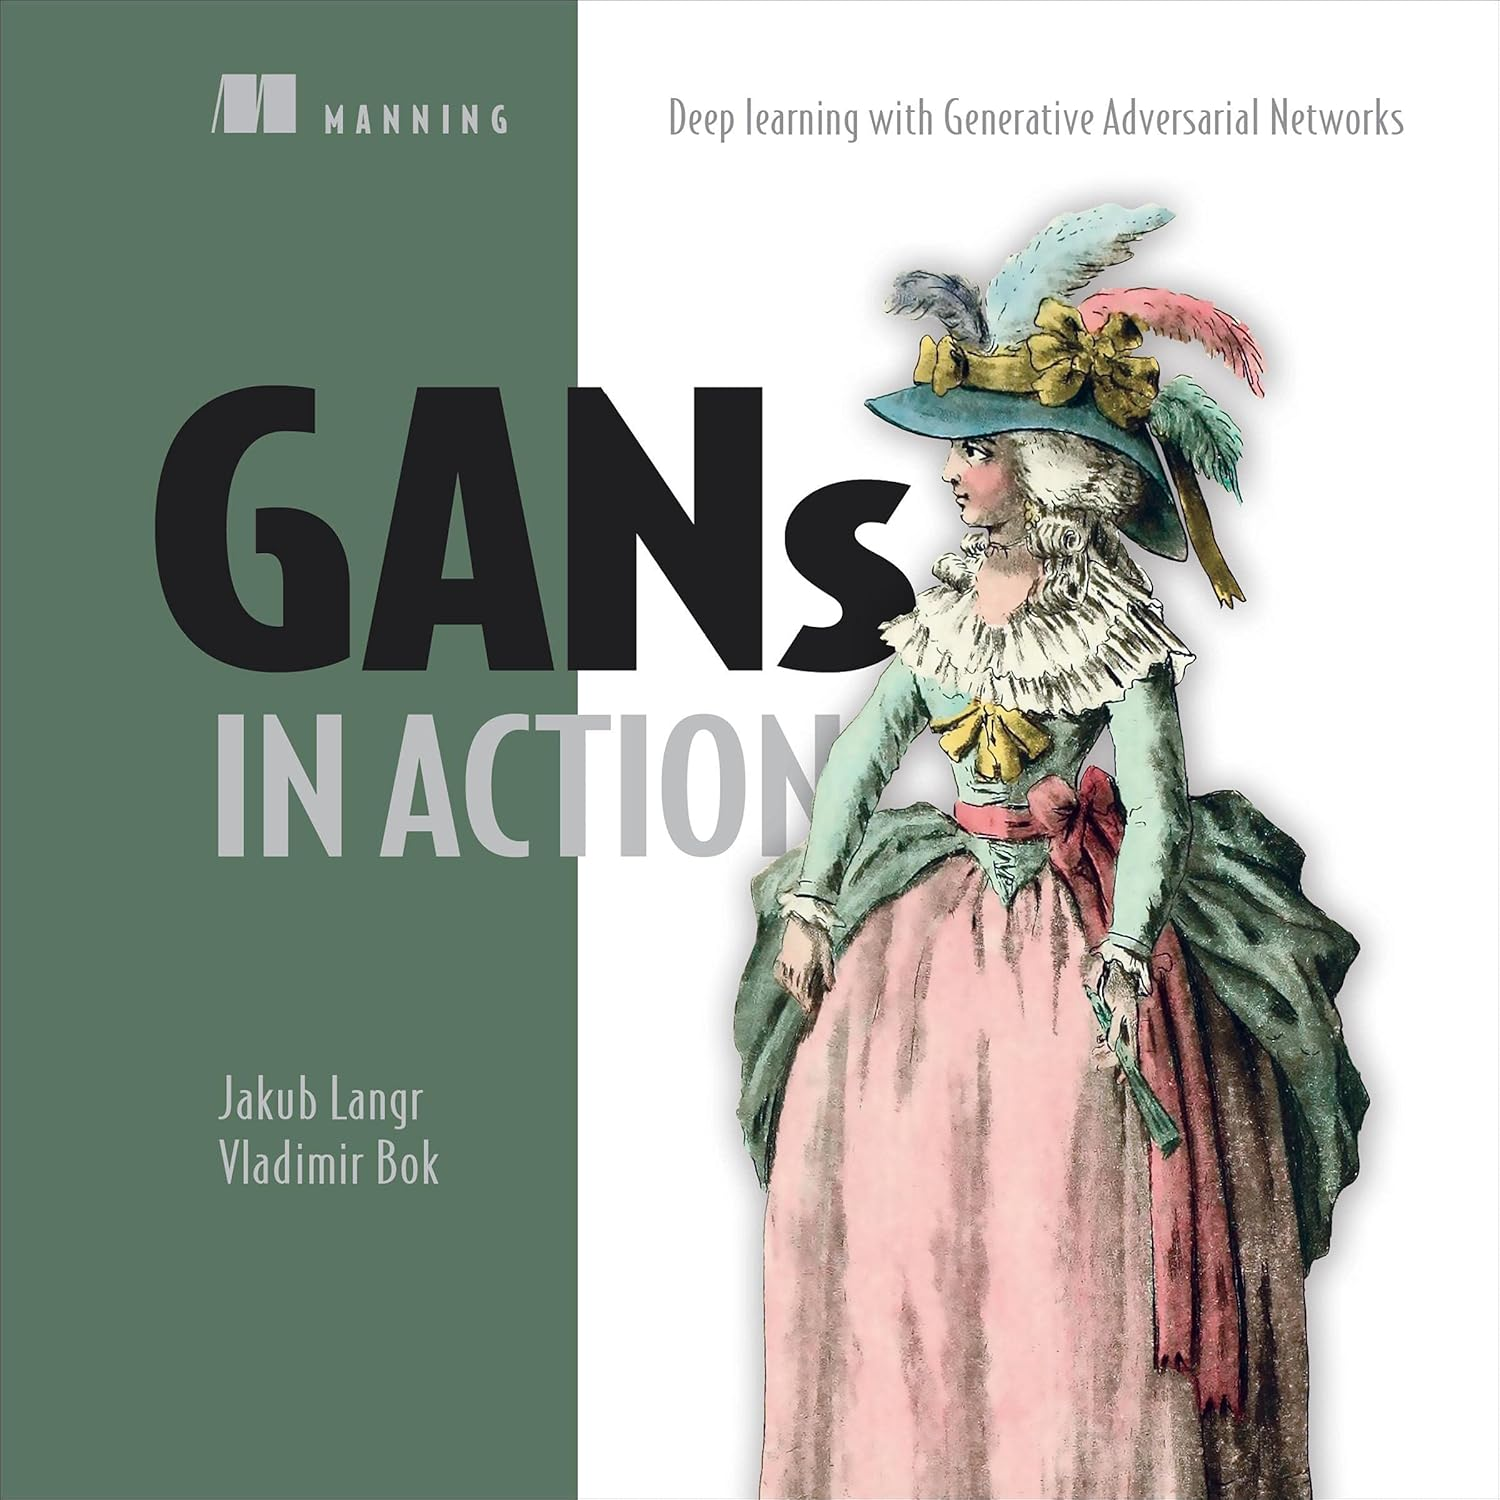

In [ ]:
Image("/content/drive/MyDrive/Imagenes/libro.jpg", width=300)